In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
pd.options.mode.chained_assignment = None
from datetime import datetime

import seaborn
seaborn.set()

In [2]:
df = pd.read_csv('dog_rates_tweets.csv') #read csv
df

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [3]:
df['rating'] = df['text'].str.extract(r'([0-9]+[0-9.]*/1[0])', expand=False).str.strip() #take out rating
df

,id,created_at,text,rating
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off,NaN
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back,NaN
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14/10
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️,NaN
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...,NaN
...,...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...,NaN
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...,NaN
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...,NaN
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...,NaN


In [4]:
df = df.dropna(subset=['rating']) #filer NAN
df

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14/10
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13/10
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14/10
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13/10
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13/10
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14/10
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14/10
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13/10
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14/10


In [5]:
df['rating'] = df['rating'].str.replace(r'/10$', '') #strip '/10'
df

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14


In [6]:
df['rating'] = df['rating'].astype(float) #string->float
df = df[df.rating <= 25] #remove outlier >25
df

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [7]:
df.created_at = pd.to_datetime(df.created_at) #String->time
df

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


Text(0, 0.5, 'Rating')

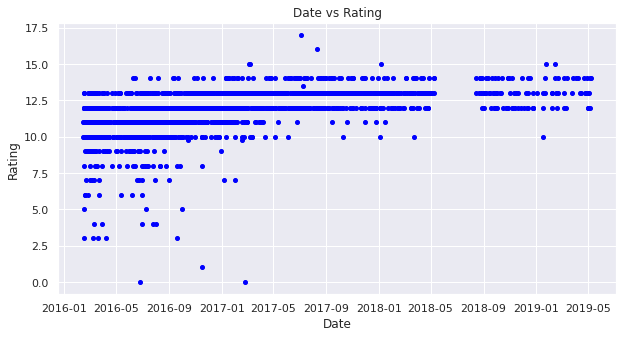

In [8]:
plt.figure(figsize=(10, 5)) #plot scatter diagram
plt.plot(df['created_at'], df['rating'],'o', color='blue',ms = 4) # build plot 2
plt.title("Date vs Rating")
plt.xlabel("Date")
plt.ylabel("Rating")

In [9]:
def to_timestamp(time):
    timestamp = time.timestamp()
    return timestamp

df['timestamp'] = df['created_at'].apply(to_timestamp) #Change timestamp to a number
df

,id,created_at,text,rating,timestamp
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09
...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09


In [10]:
fit = stats.linregress(df.timestamp, df.rating) #Get the best fit line
fit

LinregressResult(slope=3.515929974847722e-08, intercept=-40.46415480898917, rvalue=0.5005674118565122, pvalue=1.5139606492960756e-106, stderr=1.4892789052637207e-09)

In [11]:
df['prediction'] = df.timestamp*(fit.slope)+fit.intercept #Calculate the prediction
df

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [12]:
fit.slope, fit.intercept #Print out intercept and Slope

(3.515929974847722e-08, -40.46415480898917)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


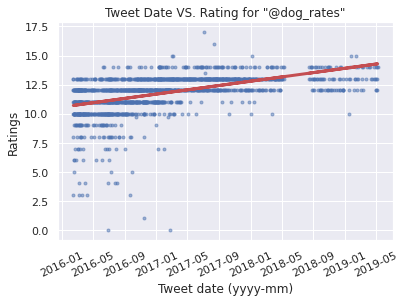

In [13]:
plt.xticks(rotation=25)
plt.plot(df['created_at'], df['rating'],'b.', alpha = 0.5) # build plot 2
plt.plot(df['created_at'], df['prediction'], 'r-', linewidth = 3)
plt.xlabel('Tweet date (yyyy-mm)')
plt.ylabel('Ratings')
plt.title('Tweet Date VS. Rating for "@dog_rates"')
plt.savefig('Dog rates.eps', format='eps', dpi=1000000)


In [14]:
print("p-value is: ", fit.pvalue)

p-value is:  1.5139606492960756e-106


(array([  3.,   0.,   8.,   5.,  20.,  60., 501., 914., 154.,   4.]),
 array([-11.85115447, -10.19011766,  -8.52908085,  -6.86804404,
         -5.20700723,  -3.54597043,  -1.88493362,  -0.22389681,
          1.43714   ,   3.09817681,   4.75921362]),
 <BarContainer object of 10 artists>)

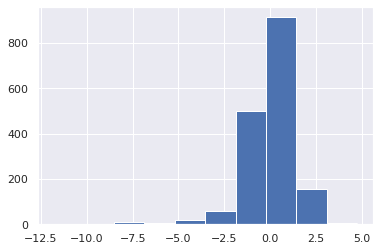

In [21]:
plt.hist(df['rating']-df['prediction'])

In [63]:
def changedata(a):
    b = datetime.strftime(a, '%Y-%m')
    return b
    
df2 = df
df2['new'] = df2['created_at'].apply(changedata)
df2
a = df2.groupby(['new']).count()
a['year'] = a.index.values


,id,created_at,text,rating,timestamp,prediction,year
new,,,,,,,
2016-02,66,66,66,66,66,66,2016-02
2016-03,134,134,134,134,134,134,2016-03
2016-04,61,61,61,61,61,61,2016-04
2016-05,59,59,59,59,59,59,2016-05
2016-06,97,97,97,97,97,97,2016-06
2016-07,103,103,103,103,103,103,2016-07
2016-08,75,75,75,75,75,75,2016-08
2016-09,82,82,82,82,82,82,2016-09
2016-10,81,81,81,81,81,81,2016-10


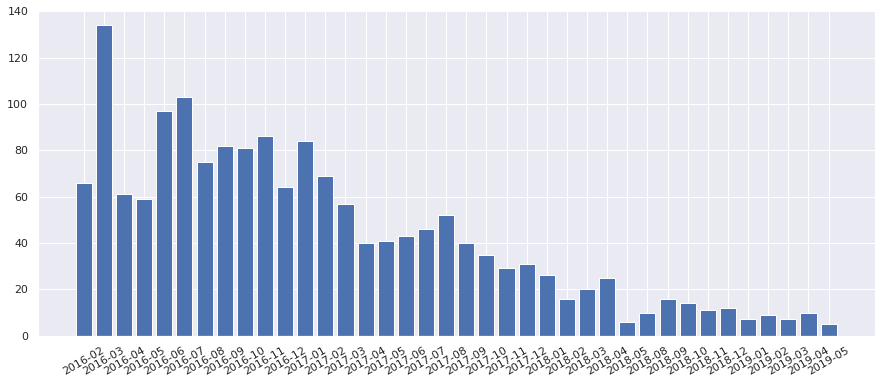

In [93]:
plt.figure(figsize = [15, 6])
plt.xticks(rotation=30)

plt.bar(a.year, a.rating, label = 'Bar', align='center',)

plt.savefig('Dog rates1.eps', format='eps', dpi=1000000)
